https://ecco-v4-python-tutorial.readthedocs.io/Downloading_the_ECCO_v4_state_estimate.html
https://ecco-v4-python-tutorial.readthedocs.io/Installing_Python_and_Python_Packages.html

In [74]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
import iris

#looks liek we can get teh grid for teh 5 faces setup here http://mit.ecco-group.org/opendap/ecco_for_las/version_4/release1/nctiles_grid/contents.html
# linked from Forget, G., J.-M. Campin, P. Heimbach, C. N. Hill, R. M. Ponte, and C. Wunsch, 2015:
#   ECCO version 4: an integrated framework for non-linear inverse modeling and global ocean
#   state estimation. Geoscientific Model Development, 8, 3071-3104, doi:10.5194/gmd-8-3071-2015

# setting up on batmobile

conda activate mypython3

#Intstall the following one by one
conda install geos
conda install -c conda-forge cmocean
conda install -c conda-forge pyresample
conda install -c conda-forge xarray dask netCDF4 bottleneck
conda install -c conda-forge xmitgcm
conda install -c conda-forge xgcm
conda install -c conda-forge cartopy pyepsg

> mkdir ~/ECCOv4-py
> cd ~/ECCOv4-py
> git clone https://github.com/ECCO-GROUP/ECCOv4-py.git


In [11]:
import sys
sys.path.append('/Users/ph290/ECCOv4-py')
# sys.path.append('/home/ph290/ECCOv4-py/ECCOv4-py')
import ecco_v4_py as ecco

In [13]:

## Set top-level file directory for the ECCO NetCDF files
## =================================================================
# base_dir = '/home/username/'
base_dir = '/Users/ph290/Downloads/'
# base_dir = '/data/BatCaveNAS/ph290/ecco4/'

## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release3_alt/'

## define the directory with the model grid
grid_dir = ECCO_dir + 'nctiles_grid/'

## load the grid
grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')

In [15]:
salt_dir = ECCO_dir + '/nctiles_monthly/SALT/'
salt_dataset = xr.open_dataset(salt_dir + '/SALT_1992.nc')
salt_dataset.SALT

<xarray.DataArray 'SALT' (time: 12, tile: 13, k: 50, j: 90, i: 90)>
[63180000 values with dtype=float32]
Coordinates: (12/13)
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    Z        (k) float32 ...
    PHrefC   (k) float32 ...
    drF      (k) float32 ...
    ...       ...
    YC       (tile, j, i) float32 ...
    rA       (tile, j, i) float32 ...
    hFacC    (tile, k, j, i) float32 ...
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter     (time) int32 ...
  * time     (time) datetime64[ns] 1992-01-16T12:00:00 ... 1992-12-16T12:00:00
Attributes:
    units:          psu
    long_name:      Salinity
    standard_name:  sea_water_salinity

In [20]:
salt_dataset.SALT.isel(time=0)


<xarray.DataArray 'SALT' (tile: 13, k: 50, j: 90, i: 90)>
[5265000 values with dtype=float32]
Coordinates: (12/13)
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    Z        (k) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    PHrefC   (k) float32 49.05 147.1 245.2 ... 4.944e+04 5.357e+04 5.794e+04
    drF      (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    ...       ...
    YC       (tile, j, i) float32 ...
    rA       (tile, j, i) float32 ...
    hFacC    (tile, k, j, i) float32 ...
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter     int32 732
    time     datetime64[ns] 1992-01-16T12:00:00
Attributes:
    units:          psu
    long_name:      Salinity
    standard_name:  sea_water_salinity

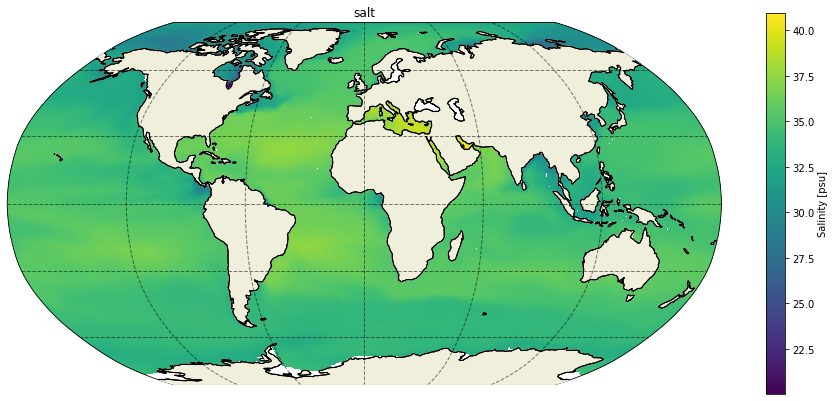

In [83]:

salt  = salt_dataset.SALT.isel(time=0)
# mask to nan where hFacC(k=0) = 0
salt  = salt.where(grid.hFacC.isel(k=0))
salt = salt.isel(k=0)

fig  = plt.figure(figsize=(16,7))
# ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, cmin=-1.5, cmax=1.5);plt.title('salt');
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, );plt.title('salt');

ValueError: too many values to unpack (expected 2)

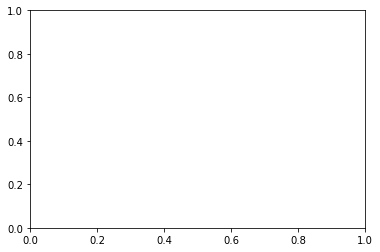

In [32]:
plt.pcolormesh(grid.XC.data, grid.YC.data, salt.data)

<ipython-input-37-fe005363c5e1>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid.isel(tile=tile_no).XC.data, grid.isel(tile=tile_no).YC.data, salt.isel(tile=tile_no).data)


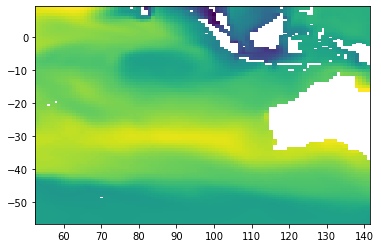

In [37]:
# grid.isel(tile=0)
tile_no = 4
plt.pcolormesh(grid.isel(tile=tile_no).XC.data, grid.isel(tile=tile_no).YC.data, salt.isel(tile=tile_no).data)

In [41]:
grid

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)
Coordinates: (12/41)
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    maskC      (k, tile, j, i) bool False False False ... False False False
    maskW      (k, tile, j, i_g) bool False False False ... False False False
    maskS      (k, tile, j_g, i) bool False False False ... False False False
    maskCtrlW  (k, tile, j, i_g) bool False False False ... False False False
    maskCtrlS  (k, tile, j_g, i) bool False False False ... False False False
    maskCtrlC  (k, tile, j, i) bool False False False ... False False False
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(extra_metadata=None, ll...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

TMM stuff



In [59]:
from scipy.io import loadmat
x = loadmat('/Users/ph290/Downloads/_DIC_plot0100.mat')



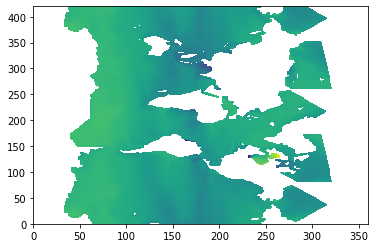

In [60]:
plt.pcolormesh(x['DIC_plot'][:,:,0])

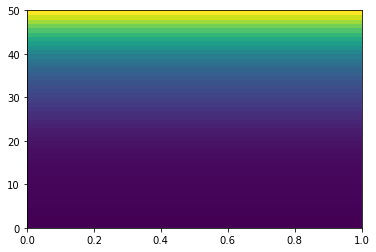

In [53]:
plt.pcolormesh(x['z'])

In [56]:
np.shape(x['DIC_plot'][:,:,0])

(420, 360)

In [108]:
dic = iris.load('/Users/ph290/Downloads/DIC_1400.nc')

In [65]:
dic


[<iris 'Cube' of Longitude / (degrees) (-- : 270; -- : 90)>,
<iris 'Cube' of DIC / (unknown) (Depth: 50; -- : 270; -- : 90)>,
<iris 'Cube' of Latitude / (degrees) (-- : 270; -- : 90)>]

<ipython-input-105-c0b1cb68f090>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dic[0].data,dic[2].data,dic[0].data)


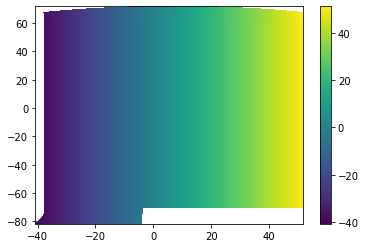

In [105]:
plt.pcolormesh(dic[0].data,dic[2].data,dic[0].data)
plt.colorbar()

ValueError: too many values to unpack (expected 2)

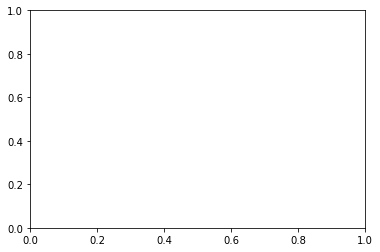

<ipython-input-81-f8a844b08ff9>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid.isel(tile=tile_no).XC.data, grid.isel(tile=tile_no).YC.data, dic[2][0:90,:].data)


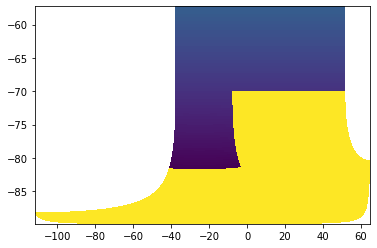

In [81]:
tile_no = 0
plt.pcolormesh(grid.isel(tile=tile_no).XC.data, grid.isel(tile=tile_no).YC.data, dic[2][0:90,:].data)

In [79]:
np.shape(dic[2][0:90,:].data)

(90, 90)

In [84]:
dic_dataset = salt_dataset.copy()

# salt  = salt_dataset.SALT.isel(time=0)
# # mask to nan where hFacC(k=0) = 0
# salt  = salt.where(grid.hFacC.isel(k=0))
# salt = salt.isel(k=0)

# fig  = plt.figure(figsize=(16,7))
# # ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, cmin=-1.5, cmax=1.5);plt.title('salt');
# ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, );plt.title('salt');

In [166]:
dic1 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f1.nc')
dic2 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f2.nc')
dic3 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f3.nc')
dic4 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f4.nc')
dic5 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f5.nc')
dics = [dic1,dic2,dic3,dic4,dic5]

alk1 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f1.nc')
alk2 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f2.nc')
alk3 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f3.nc')
alk4 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f4.nc')
alk5 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f5.nc')
alks = [alk1,alk2,alk3,alk4,alk5]

## This is teh key bit!

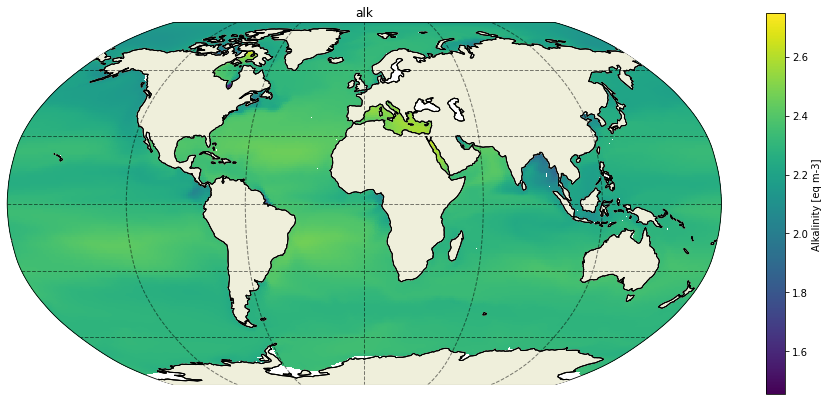

In [187]:
cubes = alks
title = 'alk'
standard_name = 'Alkalinity'
long_name = 'Alkalinity'
units = 'eq m-3'

dic_dataset = salt_dataset.copy()

cube_field  = dic_dataset.SALT.isel(time=0)
# mask to nan where hFacC(k=0) = 0
cube_field  = cube_field.where(grid.hFacC.isel(k=0))
cube_field = cube_field.isel(k=0)
cube_field.attrs['standard_name'] = standard_name
cube_field.attrs['long_name'] = long_name
cube_field.attrs['units'] = units

cube_field.isel(tile=0).data[:] = alks[0][1][0,0:90,:].data.data
cube_field.isel(tile=1).data[:] = alks[0][1][0,90:180,:].data.data
cube_field.isel(tile=2).data[:] = alks[0][1][0,180:270,:].data.data

cube_field.isel(tile=3).data[:] = alks[1][1][0,0:90,:].data.data
cube_field.isel(tile=4).data[:] = alks[1][1][0,90:180,:].data.data
cube_field.isel(tile=5).data[:] = alks[1][1][0,180:270,:].data.data

cube_field.isel(tile=6).data[:] = alks[2][1][0,:,:].data.data

cube_field.isel(tile=7).data[:] = alks[3][1][0,:,0:90].data.data
cube_field.isel(tile=8).data[:] = alks[3][1][0,:,90:180].data.data
cube_field.isel(tile=9).data[:] = alks[3][1][0,:,180:270].data.data

cube_field.isel(tile=10).data[:] = alks[4][1][0,:,0:90].data.data
cube_field.isel(tile=11).data[:] = alks[4][1][0,:,90:180].data.data
cube_field.isel(tile=12).data[:] = alks[4][1][0,:,180:270].data.data

fig  = plt.figure(figsize=(16,7))
# ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, cmin=-1.5, cmax=1.5);plt.title('salt');
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, cube_field, show_colorbar=True, );plt.title(title);
